# AST 7939 Homework Assignment #1 (10 pts)

## All work is due Wednesday February 8 at 5 pm.

## Instruction: 
Do all homework in this Jupyter notebook and submit your final .ipynb file via Canvas. Show ALL your work and add comments to describe what your code does. 

You are encouraged to discuss homework problems with your classmates. However, your python script and answers to the questions must be written by yourself.

In [113]:
# import statements for commonly used packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance_matrix

## 1. Curse of dimensionality (4 pts)

We learned that kNN suffers from the curse of dimensionality. In class, we estimated the size of a hypercube that includes $k$ nearest neighbors as a function of dimension and number of data points. In this homework, let's look into this problem in a more quantitative way by following the steps below. 

(a) Make six $D$-dimensional numpy arrays, where $D = 1, 2, 5, 10, 100,$ and $1000$. Each array contains $n=10^4$ data points that are randomly distributed in the $D$-dimensional space (hint: use np.random.rand). Let's assume that the side of each hypercube ranges from 0 to 1, so the volume of hypercubes is 1. (1 pt)


In [2]:
# Make sure to add comments saying what you are doing
ele = int(10**4) # number of elements 
arr_1d = np.random.rand(ele, 1) # each element gets one value to go with it

In [3]:
arr_2d = np.random.rand(ele, 2) # each element gets two values to go with it

In [4]:
arr_5d = np.random.rand(ele, 5) # each element has 5 attributes

In [5]:
arr_10d = np.random.rand(ele, 10) # each element has 10 attributes

In [6]:
arr_1000d = np.random.rand(ele, 1000) # each element has 1000 attributes

(b) For each array, compute the distance between each data points. Since you have $10^4$ data points in each array, you need to compute distance total $(10,000 \times 9,999)/2 = 49,995,000$ times. There could be faster ways to do this computation, but I found ``distance_matrix`` from ``scipy.spatial`` does a decent job. Once you computed all the distance, normalize them by the maximum possible distance in each hypercube, that is $\sqrt{D}$. (1 pt)


In [7]:
# Find the distance using distance_matrix and then divide by the square root of the dimension
# Normalize them by the maximum possible distance in each hypercube np.sqrt(D)
dist_1d = distance_matrix(arr_1d, arr_1d) / np.sqrt(1)

In [8]:
dist_2d = distance_matrix(arr_2d, arr_2d) / np.sqrt(2) # Find the normalized distances for the 2d array

In [9]:
dist_5d = distance_matrix(arr_5d, arr_5d) / np.sqrt(5) # Find the normalized distances for the 5d array

In [10]:
dist_10d = distance_matrix(arr_10d, arr_10d) / np.sqrt(10) # Find the normalized distances for the 10d array

In [11]:
dist_1000d = distance_matrix(arr_1000d, arr_1000d) / np.sqrt(1000) # Find the normalized distances for the 1000d array

(c) In a single figure, plot six histograms (one for each array) showing the number of counts on the y axis vs. normalized distance between data points on the x axis. Make sure that your figure is readble. Also, label them properly so that readers can understand what the figure shows. (1 pt)


In [12]:
# Plot a histogram for each dimension. Make sure to label the plots and make them pretty
hist_1d, bins_1d = np.histogram(dist_1d) # Make histogram for 1d array 

In [13]:
hist_2d, bins_2d = np.histogram(dist_2d) # Make histogram for 2d array 

In [14]:
hist_5d, bins_5d = np.histogram(dist_5d) # Make histogram for 5d array 

In [15]:
hist_10d, bins_10d = np.histogram(dist_10d) # Make histogram for 10d array 

In [16]:
hist_1000d, bins_1000d = np.histogram(dist_1000d) # Make histogram for 1000d array 

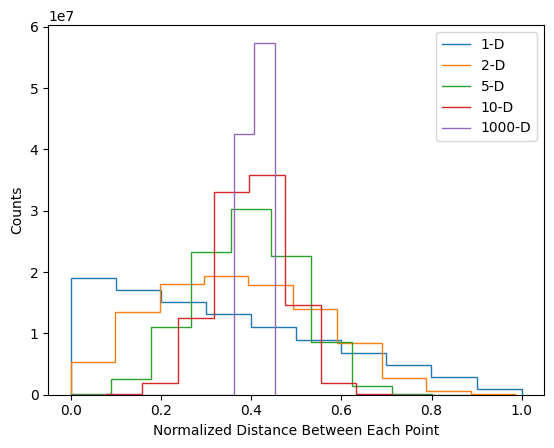

In [26]:
# Plot each calculated histogram
plt.stairs(hist_1d, bins_1d, label='1-D')
plt.stairs(hist_2d, bins_2d, label='2-D')
plt.stairs(hist_5d, bins_5d, label='5-D')
plt.stairs(hist_10d, bins_10d, label='10-D')
plt.stairs(hist_1000d, bins_1000d, label='1000-D')

# Labels for plot to make it look nice
plt.xlabel('Normalized Distance Between Each Point')
plt.ylabel('Counts')
plt.legend()

(d) Discuss what you see in the figure in the context of kNN. (1 pt)

The distances between each of the $10^4$ points for the n-dimension arrays are displayed in the above figure. As the number of dimensions increases, the mean normalized distance increases and the distribution of the distances decreases. As the number of dimensions increases, the distance between each point becomes more similar as the points spread out over more dimensions. 









## 2. Classifying objects in SDSS data using kNN and decision tree (6 pts)

In [33]:
# Importing from sklearn
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import export_graphviz, DecisionTreeClassifier, plot_tree

SDSS.csv contains various information on 150,000 stars, galaxies, and quasars, including ugriz magnitudes and redshift. Let's build kNN and DT models based on this dataset. You may want to use pandas to read in the data (https://pandas.pydata.org/).

(a) Read in the data. Using the provided ugriz magnitudes, compute and store u-g, g-r, r-i, i-z colors for each object. (1 pt)

In [42]:
# subtract the magnitudes to get the colors
# Read in data
dataset_sdss = pd.read_csv('SDSS.csv')

# Find magnitudes for each object
mag_u = dataset_sdss['u']
mag_g = dataset_sdss['g']
mag_r = dataset_sdss['r']
mag_i = dataset_sdss['i']
mag_z = dataset_sdss['z']

# Find colors for each object
color_ug = dataset_sdss['u'] - dataset_sdss['g']
color_gr = dataset_sdss['g'] - dataset_sdss['r']
color_ri = dataset_sdss['r'] - dataset_sdss['i']
color_iz = dataset_sdss['i'] - dataset_sdss['z']

# Find the redshift for each object
redshift = dataset_sdss['redshift']


(b) Make kNN models. Vary $k$ from 1 to 30 and make a figure showing training/test accuracy vs. $k$. What is the optimal $k$ that results in the highest test accuracy? Use u, g, r, i, z magnitudes, u-g, g-r, r-i, i-z colors, and redshift as features -- so you have a 10-dimensional dataset. (1 pt)

In [43]:
# Just like in class. Remember to normalize!!! 10-dimensional space

# Features into array
X = np.array([
    mag_u, 
    mag_g,
    mag_r,
    mag_i,
    mag_z, 
    color_ug,
    color_gr,
    color_ri,
    color_iz,
    redshift
    ]).T

# Labels
y = np.expand_dims(dataset_sdss['class'], axis=1)

# Separate into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [59]:
feature_names = np.array([ # Used later for bar chart plot
    'u',
    'g',
    'r',
    'i',
    'z',
    'u-g',
    'g-r',
    'r-i',
    'i-z',
    'redshift'
]).T

In [45]:
# Scale the data so that distances are effective
X_train_scaled = StandardScaler().fit(X_train).transform(X_train)
X_test_scaled = StandardScaler().fit(X_train).transform(X_test)

Text(0, 0.5, 'Accuracy')

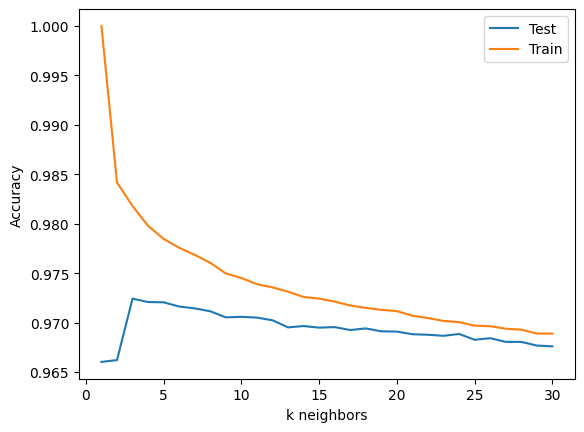

In [52]:
# Make kNN models varying k from 1 to 30
top = 30
k_neighbors = np.arange(1, top+1)
test_acc = np.zeros(top)
train_acc = np.zeros(top)

# Make a model for each value of k
for k in k_neighbors: 
    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, np.ravel(y_train,order='C'))
    test_acc[k-1] = model.score(X_test_scaled, y_test)
    train_acc[k-1] = model.score(X_train_scaled, y_train)

# Plot the testing and training accuracy for each value of k
plt.plot(k_neighbors, test_acc, label='Test')
plt.plot(k_neighbors, train_acc, label='Train')
plt.legend()
plt.xlabel('k neighbors')
plt.ylabel('Accuracy')

In [56]:
print('The optimal k that results in the highest test accuracy:', k_neighbors[np.argmax(test_acc)])

The optimal k that results in the highest test accuracy: 3


In [62]:
# Define best kNN model
model_best_kNN = neighbors.KNeighborsClassifier(n_neighbors=3)
model_best_kNN.fit(X_train_scaled, np.ravel(y_train,order='C'))

KNeighborsClassifier(n_neighbors=3)

(c) Make DT models. Vary max_depth from 1 to 30 and make a figure showing training/test accuracy vs. max_depth. What is the optimal max_depth that results in the highest test accuracy? Again, use u, g, r, i, z magnitudes, u-g, g-r, r-i, i-z colors, and redshift as features.(1 pt)

Text(0, 0.5, 'Accuracy')

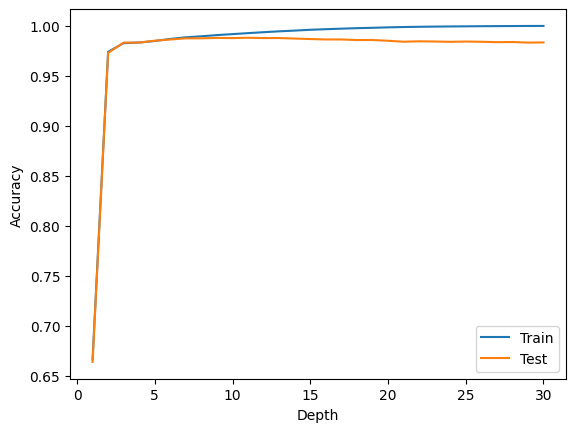

In [54]:
# Vary max depth from 1-30, same as in class

top = 30
depth = np.arange(1, top+1)
train_acc_dt = np.zeros(top)
test_acc_dt = np.zeros(top)

# Fit model for each max_depth
for d in depth:
    model = DecisionTreeClassifier(max_depth=d, random_state=0)
    model.fit(X_train, y_train)
    train_acc_dt[d-1] = model.score(X_train, y_train)
    test_acc_dt[d-1] = model.score(X_test, y_test)

# Plot testing and training accuracy for each max_depth
plt.plot(depth, train_acc_dt, label='Train')
plt.plot(depth, test_acc_dt, label='Test')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Accuracy')


In [57]:
print('The optimal max_depth that results in the highest test accuracy:', depth[np.argmax(test_acc_dt)])

The optimal max_depth that results in the highest test accuracy: 11


(d) For your best decision tree model, which features are the most important? (1 pt)

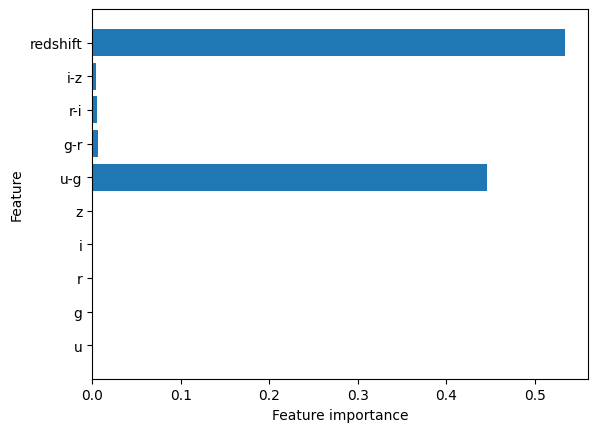

In [63]:
# Like the bar chart from class
# Use best decision tree model
model_best_dt = DecisionTreeClassifier(max_depth=11, random_state=0)
model_best_dt.fit(X_train, y_train)

# Using same code to plot bar chart from class
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(model)
# Redshift and u-g are the most used features

The most important features of the best decision tree model are the redshift and color u-g.

(e) SDSS_evaluation.csv contains another 150,000 stars, galaxies, and quasars. Using the best kNN and decision tree models you obtained, make predictions for this new dataset and compute the accuracy. (1 pt)

In [70]:
# Read in evaluation data
data = pd.read_csv('SDSS_evaluation.csv')

# Put evaluation data into array
X_eval = np.array([
    data['u'], 
    data['g'],
    data['r'],
    data['i'],
    data['z'], 
    data['u']-data['g'],
    data['g']-data['r'],
    data['r']-data['i'],
    data['i']-data['z'],
    data['redshift']
    ]).T

# Scale evaluation data like training data
X_eval_scaled = StandardScaler().fit(X_train).transform(X_eval)
y_eval = np.expand_dims(data['class'], axis=1)

In [76]:
# Test using best kNN model
model_best_kNN = neighbors.KNeighborsClassifier(n_neighbors=3)
model_best_kNN.fit(X_train_scaled, np.ravel(y_train,order='C'))

print('Accuracy of best kNN model on evaluation data:')
model_best_kNN.score(X_eval_scaled, y_eval)
# Accuracy is not the greatest, why?

Accuracy of best kNN model on evaluation data:


0.6848666666666666

In [77]:
# Test using best decision tree model
model_best_dt = DecisionTreeClassifier(max_depth=11, random_state=0)
model_best_dt.fit(X_train, y_train)

print('Accuracy of best decision tree model on evaluation data:')
model_best_dt.score(X_eval, y_eval)
# Better, but still not great, why?

Accuracy of best decision tree model on evaluation data:


0.7704666666666666

(f) You should have gotten poor performance from your kNN and decision tree models unless you did some magic. Have a look at the your training/evaluation datasets and discuss what might have caused the poor performace. (1 pt)

In [107]:
# Use most important features to see how the model is classifying in 2D
color_ug_qso = dataset_sdss['u'][dataset_sdss['class'] == 'QSO'] - dataset_sdss['g'][dataset_sdss['class'] == 'QSO']
redshift_qso = dataset_sdss['redshift'][dataset_sdss['class'] == 'QSO']

color_ug_gal = dataset_sdss['u'][dataset_sdss['class'] == 'GALAXY'] - dataset_sdss['g'][dataset_sdss['class'] == 'GALAXY']
redshift_gal = dataset_sdss['redshift'][dataset_sdss['class'] == 'GALAXY']

color_ug_str = dataset_sdss['u'][dataset_sdss['class'] == 'STAR'] - dataset_sdss['g'][dataset_sdss['class'] == 'STAR']
redshift_str = dataset_sdss['redshift'][dataset_sdss['class'] == 'STAR']

color_ug_qso_e = data['u'][data['class'] == 'QSO'] - data['g'][data['class'] == 'QSO']
redshift_qso_e = data['redshift'][data['class'] == 'QSO']

color_ug_gal_e = data['u'][data['class'] == 'GALAXY'] - data['g'][data['class'] == 'GALAXY']
redshift_gal_e = data['redshift'][data['class'] == 'GALAXY']

color_ug_str_e = data['u'][data['class'] == 'STAR'] - data['g'][data['class'] == 'STAR']
redshift_str_e = data['redshift'][data['class'] == 'STAR']

Text(0.5, 1.0, 'Evaluation Data')

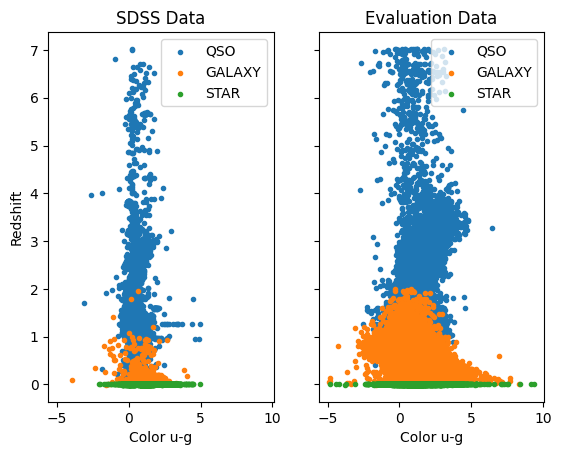

In [112]:
# Plot redshift vs u-g color
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True)

ax1.scatter(color_ug_qso, redshift_qso, marker='.', label='QSO')
ax1.scatter(color_ug_gal, redshift_gal, marker='.', label='GALAXY')
ax1.scatter(color_ug_str, redshift_str, marker='.', label='STAR')

ax1.legend()

ax2.scatter(color_ug_qso_e, redshift_qso_e, marker='.', label='QSO')
ax2.scatter(color_ug_gal_e, redshift_gal_e, marker='.', label='GALAXY')
ax2.scatter(color_ug_str_e, redshift_str_e, marker='.', label='STAR')

ax2.legend()

ax1.set_xlabel('Color u-g')
ax2.set_xlabel('Color u-g')

ax1.set_ylabel('Redshift')

ax1.set_title('SDSS Data')
ax2.set_title('Evaluation Data')

The poor performance was likely due to the overlap between galaxies and QSOs. The main things that the DT model uses to differentiate the three are redshift and U-G color. Plotting those above, we see that the amount of redshifts covered by both galaxies and QSOs is much larger in the SDSS evaluation data than the original SDSS data. Likely, the evaluation data has higher senstivity to dimmer objects. The model could be improved by using more useful features, as the magnitudes are barely used at all despite being half of the data provided. The useful features for finding the difference between QSOs, galaxies and stars include redshift and absolute magnitude.
